#Data Science

##Question 1 : NumPy Challenge

In [ ]:
# NumPy Task:
# Given a 50x50 NumPy array `pollutant_matrix`, do the following:
# 1. For each row, replace values below the row’s 25th percentile with the mean of that row.
# 2. Then, for the entire matrix, find all values greater than 1.5 × the column’s std deviation, and cap them at 1.5 × std.
# Return the final modified matrix.

In [ ]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Generate a 50x50 array with pollution values ranging from 10 to 300 (float)
pollutant_matrix = np.random.uniform(10, 300, size=(50, 50))

# Preview
print(pollutant_matrix[:3, :5])  # first 3 rows and 5 columns

[[118.61663447 285.70714886 222.27824313 183.61096042  55.24540573]
 [291.17954205 234.78851877 282.45469305 269.49993162 183.39099386]
 [ 19.11446385 194.55901927 101.16323451 157.48550044 273.19427744]]


In [ ]:
# Rowise 25th percentile and mean calculation'
row_percentile = np.percentile(pollutant_matrix, 25, axis =1).reshape(-1,1)
row_mean = np.mean(pollutant_matrix, axis = 1).reshape(-1,1)

# Replacing rows with percentile mean
pollutant_matrix = np.where(pollutant_matrix < row_percentile, row_mean, pollutant_matrix)

# Standard deviation calculation
col_std = np.std(pollutant_matrix, axis =0)

# Replacing
pollutant_matrix = np.where(pollutant_matrix > 1.5 * col_std, 1.5 * col_std, pollutant_matrix)

# Preview
print(pollutant_matrix[:3, :5])  # first 3 rows and 5 columns

[[62.21274828 61.83427227 51.62876165 56.81910414 61.66488652]
 [62.21274828 61.83427227 51.62876165 56.81910414 61.66488652]
 [62.21274828 61.83427227 51.62876165 56.81910414 61.66488652]]


##Question 2 : Regex Challenge

In [ ]:
# Regex Task:
# Given a multiline string of product reviews:
# - Extract OrderID
# - Extract Username (only if it contains only letters, numbers, or underscores)
# - Extract Comment only if Rating ≤ 3
# Return as a list of dictionaries with keys: 'order_id', 'user', 'comment'

In [ ]:
import re

reviews = """
OrderID: #X3412
User: karthik_b
Rating: 2
Comment: "Late delivery. No call received."

OrderID: #X3413
User: dev@1996
Rating: 5
Comment: "Delivered on time, excellent packaging!"

OrderID: #X3414
User: ananya_99
Rating: 3
Comment: "Product was damaged. Refund issued quickly."

OrderID: #X3415
User: r@hul
Rating: 1
Comment: "Wrong item sent. No response from support."
"""

In [ ]:
import re

# Extract blocks
order_id = re.findall(r'OrderID:\s*(#\w+)', reviews)
username = re.findall(r'User:\s*([A-Za-z0-9_]+)\b', reviews)
comment = re.findall(r'Rating:\s*[1-3]\s*Comment:\s*"(.*?)"', reviews)

# Combine into list of dictionaries
final = [
    {'order_id': oid, 'user': user, 'comment': com}
    for oid, user, com in zip(order_id, username, comment)
]

# Preview
for entry in final:
    print(entry)

{'order_id': '#X3412', 'user': 'karthik_b', 'comment': 'Late delivery. No call received.'}
{'order_id': '#X3413', 'user': 'dev', 'comment': 'Product was damaged. Refund issued quickly.'}
{'order_id': '#X3414', 'user': 'ananya_99', 'comment': 'Wrong item sent. No response from support.'}


##Question 3 : Pandas Challenge

In [ ]:
import pandas as pd
import numpy as np

# ✅ Step 0: Create the mock DataFrame
np.random.seed(0)

dates = pd.date_range(start='2023-01-01', periods=60)
states = ['Tamil Nadu', 'Karnataka', 'Kerala']

data = {
    'State': np.repeat(states, repeats=len(dates)),
    'Date': dates.tolist() * len(states),
    'PowerDemand': np.random.randint(4000, 10000, size=len(dates)*len(states))
}

power_data = pd.DataFrame(data)

# ✅ Task:

# 1. Convert 'Date' column to datetime and sort by 'State' and 'Date'.
# 2. For each state, compute a 7-day rolling average of PowerDemand.
# 3. Flag rows where:
#     - Today’s PowerDemand > 120% of the 7-day rolling average
#     - AND next day’s PowerDemand is also > the 7-day rolling average
# 4. Return a summary DataFrame with only those flagged rows:
#    ['State', 'Date', 'PowerDemand', 'RollingAvg', 'NextDayDemand']


power_data.columns = [col.strip().lower() for col in power_data.columns]

# Part one
power_data['date'] = pd.to_datetime(power_data['date'])
sorted_powerdata = power_data.sort_values(by =['state','date'])

# Part two
sorted_powerdata['rolling_average'] = sorted_powerdata.groupby('state')['powerdemand'].transform(
    lambda x : x.rolling(window = 7, min_periods = 1).mean()
)

# Part three

# Next day power demand
sorted_powerdata['nextdaydemand'] = sorted_powerdata.groupby('state')['powerdemand'].shift(-1)

# Boolean mask
condition_today = sorted_powerdata['powerdemand'] > 1.2 * sorted_powerdata['rolling_average']
condition_next = sorted_powerdata['nextdaydemand'] > sorted_powerdata['rolling_average']

# Apply mask
flagged = sorted_powerdata[condition_today & condition_next]

# Part four

summary = flagged[['state', 'date', 'powerdemand', 'rolling_average', 'nextdaydemand']]
summary

,state,date,powerdemand,rolling_average,nextdaydemand
73,Karnataka,2023-01-14,8420,6962.285714,8870.0
86,Karnataka,2023-01-27,8469,6894.428571,9973.0
109,Karnataka,2023-02-19,8651,6903.000000,9050.0
110,Karnataka,2023-02-20,9050,7335.428571,7455.0
124,Kerala,2023-01-05,9200,7343.200000,9302.0
128,Kerala,2023-01-09,9294,6798.428571,9674.0
129,Kerala,2023-01-10,9674,7314.857143,9491.0
141,Kerala,2023-01-22,9448,6655.142857,7091.0
167,Kerala,2023-02-17,6934,5521.000000,9237.0
4,Tamil Nadu,2023-01-05,8931,7037.400000,8859.0


##Question 4 : NumPy Challenge

In [ ]:
# Given a 2D NumPy array `emissions` of shape (50, 12) representing monthly emissions for 50 sites:
# 1. For each row (site), replace values below that row’s 10th percentile with -1.
# 2. Then, cap all values greater than 2× the column-wise standard deviation with 2× std.
# Return the modified array.

import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic emissions data
# 50 sites (rows) × 12 months (columns), values from normal distribution
emissions = np.random.normal(loc=100, scale=30, size=(50, 12))

# Percentile Calculation
row_10 = np.percentile(emissions, 10, axis =1).reshape(-1,1)

# Replacing the value
emissions = np.where(emissions<row_10, -1, emissions)

# Std deviation calculation
std_2x = 2*(np.std(emissions, axis = 0)).reshape(1,-1)

# Replacing the value
emissions = np.where(emissions>std_2x, std_2x, emissions)

# Result
print(emissions[:3])




[[ 82.05618352  92.7354326  107.68796725  96.8107923   92.97539876
   92.96872495  63.17107414  98.28908026  -1.          88.72182255
   86.09746922  -1.        ]
 [ 82.05618352  -1.          -1.          83.13137412  69.61506639
   92.96872495  63.17107414  57.63088896  82.39427242  88.72182255
   96.13738833  57.25755441]
 [ 82.05618352  92.7354326   -1.          96.8107923   81.9808393
   91.24918751  63.17107414  98.28908026  82.39427242  68.26867213
   96.13738833  -1.        ]]


##Question 5 : Regex Challenge

In [ ]:
log_data = """
SessionID: S1234 | User: john_doe99 | Status: [FAIL] | Msg: "Timeout after 30s"
SessionID: S1235 | User: dev@ops | Status: [PASS] | Msg: "Successful login"
SessionID: S1236 | User: ankit_k | Status: [FAIL] | Msg: "Unauthorized access"
SessionID: S1237 | User: ramesh_k | Status: [FAIL] | Msg: "Connection refused"
SessionID: S1238 | User: dev-user | Status: [FAIL] | Msg: "Internal error"
"""

# Your task:
# - Extract entries where:
#     1. Status is [FAIL]
#     2. Username contains only letters, digits, or underscores (`[A-Za-z0-9_]`)
# - From those entries, extract:
#     - Session ID
#     - Username
#     - Message text (inside double quotes)

# ✅ Return a list of dictionaries with keys: `'session'`, `'user'`, `'message'`

import re

pattern = r'SessionID:\s*(S\d+)\s*\|\s*User:\s*([A-Za-z0-9_]+)\s*\|\s*Status:\s*\[FAIL\]\s*\|\s*Msg:\s*\"([^\"]+)\"'
matches = re.findall(pattern, log_data)

result = [{'session' : m[0], 'user' : m[1], 'message' : m[2]} for m in matches]
print(result)


[{'session': 'S1234', 'user': 'john_doe99', 'message': 'Timeout after 30s'}, {'session': 'S1236', 'user': 'ankit_k', 'message': 'Unauthorized access'}, {'session': 'S1237', 'user': 'ramesh_k', 'message': 'Connection refused'}]


##Question 6 : Pandas Challenge

In [ ]:
# You are given a DataFrame `alerts_df` with 4 columns:

# 'Region'       → string (e.g., 'North', 'South', etc.)
# 'Date'         → string format 'YYYY-MM-DD'
# 'Alert_Type'   → string (e.g., 'fire', 'flood', 'drought')
# 'Alert_Count'  → integer (number of alerts on that day)

# Your task:
# 1. Convert 'Date' to datetime and extract 'Month' as a new column.
# 2. Compute the average alert count per region and alert type for each month.
# 3. Reshape the DataFrame so that months are rows, and columns show alert types per region (e.g., 'North_fire', 'South_flood', etc.)
# 4. Find any alert type+region combos where the alert count **tripled** from one month to the next.
# 5. Return a tidy DataFrame listing:
#    ['Month', 'Region_Alert', 'Previous_Month_Count', 'Current_Month_Count']


import pandas as pd
import numpy as np

# Sample data generation
np.random.seed(42)

regions = ['North', 'South', 'East', 'West']
alert_types = ['fire', 'flood', 'drought']
dates = pd.date_range(start='2023-01-01', periods=180, freq='D')

data = {
    'Region': np.random.choice(regions, size=180),
    'Date': dates.strftime('%Y-%m-%d'),
    'Alert_Type': np.random.choice(alert_types, size=180),
    'Alert_Count': np.random.poisson(lam=3, size=180)
}

alerts_df = pd.DataFrame(data)


In [ ]:
alerts_df.columns = [col.strip().lower() for col in alerts_df.columns]

# Date Handling
alerts_df['date'] = pd.to_datetime(alerts_df['date'])
alerts_df['month'] = alerts_df['date'].dt.month

# Averaging out
avg_alerts = alerts_df.groupby(['region','alert_type','month'])['alert_count'].mean().reset_index()

# Reshaping DataFrame
avg_alerts = avg_alerts.pivot(index = 'month', columns = ['region', 'alert_type'], values = 'alert_count').reset_index()
avg_alerts.columns = ['month'] + [f"{r}_{a}" for r, a in avg_alerts.columns[1:]]

# Filtering DataFrame
avg_alerts = avg_alerts.fillna(method = 'bfill')

tripled_rows = []

cols = avg_alerts.columns.drop('month')
for col in cols:
  prev = avg_alerts[col].shift(1)
  curr = avg_alerts[col]

  mask = (curr >= 3 * prev) & (~ prev.isna())

  for idx in avg_alerts[mask].index:
    tripled_rows.append({
        'month' : avg_alerts.loc[idx, 'month'],
        'region_alert' : col,
        'previous_month_count' : prev[idx],
        'current_month_count' : curr[idx]
    })

tripled_df = pd.DataFrame(tripled_rows)

tripled_df



<ipython-input-19-6bb6c751140c>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  avg_alerts = avg_alerts.fillna(method = 'bfill')


,month,region_alert,previous_month_count,current_month_count
0,5,East_fire,0.0,2.000000
1,6,South_drought,0.0,2.000000
2,6,South_fire,0.0,2.333333
3,4,South_flood,0.5,2.800000
4,5,West_flood,1.0,4.500000


##Question 7 : Real World Challenge

In [6]:
import pandas as pd
import numpy as np

# Create synthetic dataset
np.random.seed(1)
dates = pd.date_range(start="2023-01-01", end="2023-06-30")
cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata']

data = {
    'City': np.random.choice(cities, size=len(dates)*2),
    'Date': np.random.choice(dates, size=len(dates)*2),
    'PM2.5': np.random.normal(loc=120, scale=40, size=len(dates)*2).clip(min=20)
}

air_quality_df = pd.DataFrame(data)

# Preview
air_quality_df.head()

,City,Date,PM2.5
0,Mumbai,2023-03-12,190.201306
1,Kolkata,2023-06-03,155.054235
2,Delhi,2023-02-18,107.888565
3,Delhi,2023-06-28,124.024029
4,Kolkata,2023-02-14,158.613810


In [36]:
air_quality_df.columns = [col.strip().lower() for col in air_quality_df.columns]

# Date Handling
air_quality_df['date'] = pd.to_datetime(air_quality_df['date'])

# Check for missing values
print(air_quality_df.isna().sum())

# Removing missing values
air_quality_df= air_quality_df.dropna(axis='index', how='any').copy()

# Date manipulation
air_quality_df['month'] = air_quality_df['date'].dt.month
air_quality_df['weekday'] = air_quality_df['date'].dt.day_name()

# Weekened Check
air_quality_df['is_weekend'] = ((air_quality_df['weekday']=='Sunday') | (air_quality_df['weekday']=='Saturday'))

# Data analysis
air_quality_df['monthly_average'] = air_quality_df.groupby(['city', 'month'])['pm2.5'].transform('mean')
air_quality_df = air_quality_df.sort_values(['city', 'date']).copy()
air_quality_df['rolling_avg'] = air_quality_df.groupby(['city'])['pm2.5'].transform(lambda x: x.rolling(window = 7, min_periods=1).mean())

# Flagging polluted days
condition_pm2_5 = ((air_quality_df['pm2.5'] > 150) & (air_quality_df['pm2.5'] > 1.3 * air_quality_df['rolling_avg']))
flagged_df = air_quality_df[condition_pm2_5]

# Final summary of flagged polluted days
summary_df = flagged_df[['city', 'date', 'pm2.5', 'rolling_avg', 'monthly_average', 'is_weekend']].copy()

# Optional: add a column for % deviation from rolling average
summary_df['pct_above_rolling'] = ((summary_df['pm2.5'] - summary_df['rolling_avg']) / summary_df['rolling_avg']) * 100

# Sort for better readability
summary_df = summary_df.sort_values(['city', 'date'])

summary_df



city               0
date               0
pm2.5              0
month              0
weekday            0
is_weekend         0
monthly_average    0
rolling_avg        0
dtype: int64


,city,date,pm2.5,rolling_avg,monthly_average,is_weekend,pct_above_rolling
306,Chennai,2023-01-19,181.984472,135.191601,139.989064,False,34.612262
188,Chennai,2023-02-18,158.880638,105.510643,108.945222,True,50.582570
277,Chennai,2023-02-24,167.755319,116.944018,108.945222,False,43.449252
39,Chennai,2023-03-01,160.431567,112.789272,132.956330,False,42.240095
343,Chennai,2023-03-24,179.603918,124.934781,132.956330,False,43.758140
73,Chennai,2023-03-25,172.707432,131.954398,132.956330,True,30.884180
135,Chennai,2023-04-07,205.789089,136.536527,124.553640,False,50.720905
258,Chennai,2023-04-08,165.419249,121.224087,124.553640,True,36.457410
342,Chennai,2023-04-08,213.760433,132.405077,124.553640,True,61.444288
359,Chennai,2023-04-08,243.709630,150.117669,124.553640,True,62.345733


#Machine Learning

##Question 1 : Curve Fitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample nonlinear data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)
y = X**3 + 0.1 * np.random.randn(100, 1)

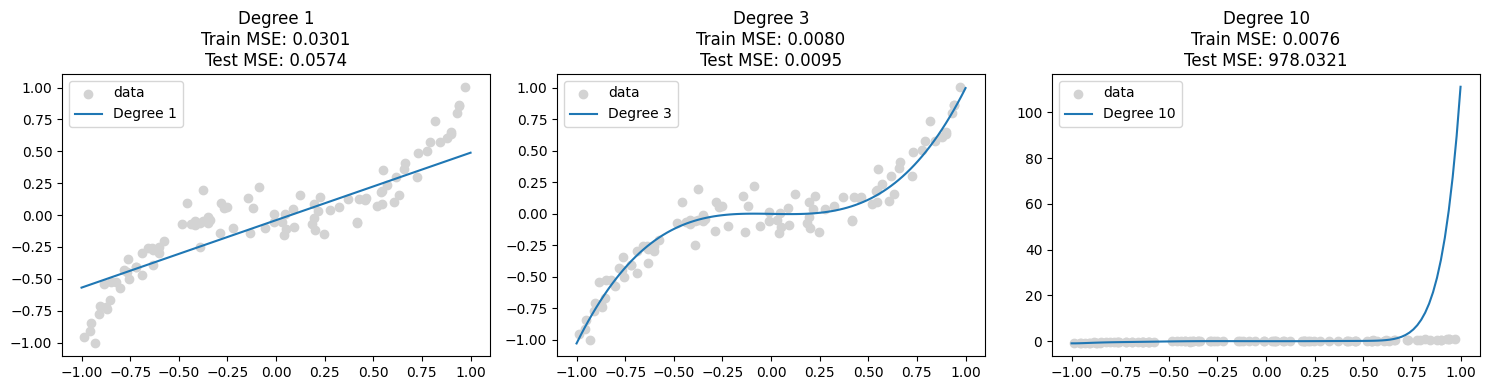

In [ ]:
degrees = [1,3,10]
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

plt.figure(figsize=(15, 4))

for i,deg in enumerate(degrees):
  model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #plot
  plt.subplot(1,3,i+1)
  plt.scatter(X, y, color = 'lightgrey', label = 'data')
  x_curve = np.linspace(-1, 1, 100).reshape(-1, 1)
  plt.plot(x_curve, model.predict(x_curve), label=f'Degree {deg}')
  plt.title(f'Degree {deg}\nTrain MSE: {mean_squared_error(y_train, model.predict(X_train)):.4f}\nTest MSE: {mean_squared_error(y_test, y_pred):.4f}')
  plt.legend()

plt.tight_layout()
plt.show()

##Question 2


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate data
np.random.seed(0)
X = np.sort(np.random.rand(50))[:, np.newaxis]
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train different degrees
for deg in [1, 3, 10]:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    score_train = model.score(X_train, y_train)
    print(f"Degree: {deg}, Test R² score: {score:.2f}")
    print(f"Degree: {deg}, Train R² score: {score_train:.2f}")

Degree: 1, Test R² score: 0.50
Degree: 1, Train R² score: 0.54
Degree: 3, Test R² score: 0.96
Degree: 3, Train R² score: 0.97
Degree: 10, Test R² score: 0.98
Degree: 10, Train R² score: 0.98


##Question 3 : Linear Regression

R² score on test data: 0.4526027629719195


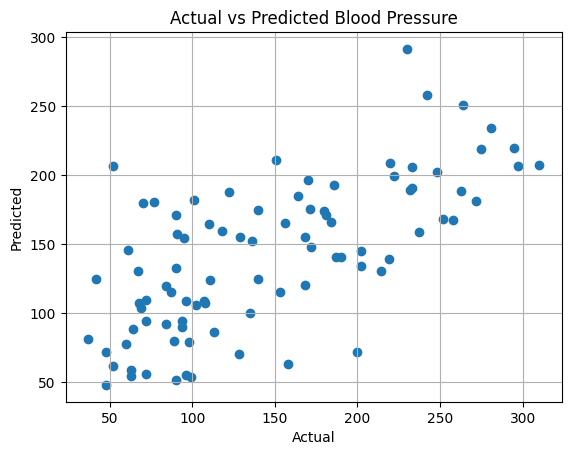

In [ ]:
# Write code to:
# 1.	Split the data into 80% training and 20% testing
# 2.	Use random_state=42 for reproducibility
# 4.	Train a Linear Regression model
# 5.	Make predictions on X_test
# 6.	Print the R² score on test data

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Evaluate on test data
r2_score = linear_reg.score(X_test, y_test)
print("R² score on test data:", r2_score)

# (Optional) Visualize predictions vs actual
y_pred = linear_reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Blood Pressure")
plt.grid(True)
plt.show()




##Question 4 : Lasso Regression


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

alpha =[0.1, 1, 10, 100]

for i in alpha:
  lasso = Lasso(i)
  lasso.fit(X_train, y_train)
  r2_score = lasso.score(X_test, y_test)
  print("R2 on the test data :", r2_score)

R2 on the test data : 0.4718547867276227
R2 on the test data : 0.3575918767219115
R2 on the test data : -0.011962984778542296
R2 on the test data : -0.011962984778542296


##Question 5 : Logistic Regression

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the data
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9736842105263158


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

